In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## A Quick Look on the Dataset

In [ ]:
# Load dataset
df = pd.read_csv("/content/gdrive/MyDrive/stout/casestudy.csv")

In [ ]:
df.shape # size of the dataset

(685927, 4)

In [ ]:
df.sample(5) 

,Unnamed: 0,customer_email,net_revenue,year
123042,123042,pzvhddnssk@gmail.com,17.38,2015
138418,138418,scbrzrwtgd@gmail.com,26.03,2015
280016,280016,vfsgpusbgo@gmail.com,1.33,2016
260708,260708,oroqenysvl@gmail.com,206.10,2016
144695,144695,zskmfadwki@gmail.com,119.25,2015


In [ ]:
df = df.rename(columns={'Unnamed: 0': 'index'})

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,685927.0,342963.000000,198010.213385,0.0,171481.50,342963.00,514444.50,685926.0
net_revenue,685927.0,125.647755,71.854528,1.0,63.51,125.73,187.82,250.0
year,685927.0,2016.027252,0.837203,2015.0,2015.00,2016.00,2017.00,2017.0


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
customer_email,685927,604618,wtbxliuywf@gmail.com,3


In [ ]:
def plot_null_values(df):
  if df.isnull().sum().sum() != 0:
    na_df = (df.isnull().sum() / len(df)) * 100
    na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
    missing_data.plot(kind = "barh")
    plt.show()
  else:
    print('No NAs found')
  return

In [ ]:
plot_null_values(df)

No NAs found


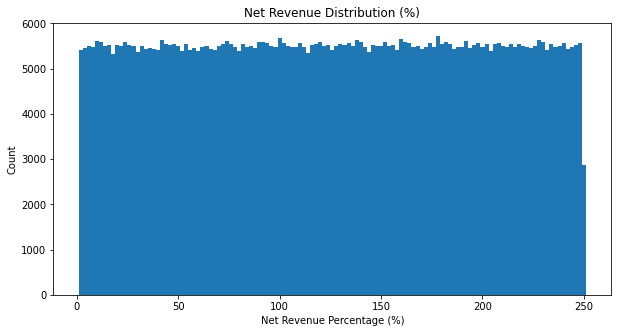

In [ ]:
# Distribution of Net Revenue
binsize = 2
interest_rate_percentage = df['net_revenue']
bins = np.arange(df['net_revenue'].min(), df['net_revenue'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = interest_rate_percentage, bins = bins)
plt.title('Net Revenue Distribution (%)')
plt.xlabel('Net Revenue Percentage (%)')
plt.ylabel('Count')
plt.show()

In [ ]:
df['year'].value_counts()

2017    249987
2015    231294
2016    204646
Name: year, dtype: int64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

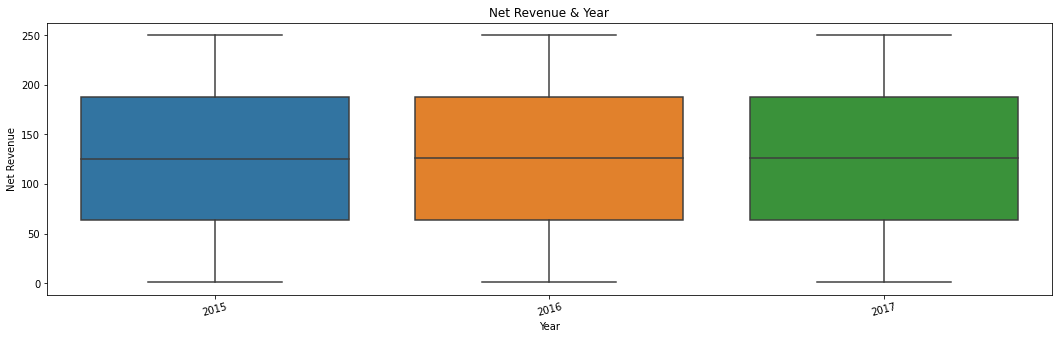

In [ ]:
plt.figure(figsize = [18, 5])
sns.boxplot(data=df,y='net_revenue',x='year')
plt.title('Net Revenue & Year')
plt.ylabel('Net Revenue')
plt.xlabel('Year')
plt.xticks(rotation=15)

## Calculations 

In [ ]:
def print_results(year, customers, revenue, prev_revenue, new_customers, per_new_customers, 
                  new_customer_revenue, per_new_customer_revenue,
                  existing_customers, per_existing_customers, exist_curr_revenue,
                  exist_prev_revenue, growth, lost_customers, revenue_lost, 
                  customers_prev):
  
  print('#########' + str(year) + '#########')
  print(' No. of Customers in Curr Year:                            ', customers)
  print(' No. of Customers in Prev Year:                            ', customers_prev)
  print(' No. of New Customers:                                     ', new_customers)
  print(' Percentage of New Customers:                              ', per_new_customers)
  print(' No. of Existing Customers from Prev Year:                 ', existing_customers)
  print(' Percentage of Existing Customers from Prev Year:          ', per_existing_customers)
  print(' No. of Lost Customers:                                    ', lost_customers)
  print()
  print(' Total Revenue in $:                                       ', revenue)
  print(' Total Revenue in $ for Prev Year:                         ', prev_revenue)
  print(' New-Customer-Revenue in $:                                ', new_customer_revenue)
  print(' Percentage of New-Customer-Revenue:                       ', per_new_customer_revenue)
  print(' Total Revenue of Existing Customers in $:                 ', exist_curr_revenue)
  print(' Total Revenue of Existing Customers in $ for Prev Year:   ', exist_prev_revenue)
  print(' Total Revenue Lost due to Attrition in $:                 ', revenue_lost)
  print()
  print(' Existing-Customer-Growth in $:                            ', growth)
  
  return 

In [ ]:
def calculate(df, curr_year, prev_year):
  df_curr = df[(df['year'] == curr_year)]
  df_prev = df[(df['year'] == prev_year)]

  # Calculate Total Revenue of Curr Year
  net_revenue_total = df_curr['net_revenue'].sum()

  # Calculate Total Revenue of Prev Year
  net_revenue_total_prev = df_prev['net_revenue'].sum()

  # Find the number of unique customers of Curr Year
  unique_customers_list = df_curr['customer_email'].unique().tolist()
  unique_customers = len(unique_customers_list)

  # Find the number of unique customers of Prev Year
  unique_prev_customers_list = df_prev['customer_email'].unique().tolist()
  unique_prev_customers = len(unique_prev_customers_list)

  # Calculate New-Customer-Revenue 
  # New-Customer-Revenue = Total Revenue from New Customers / Total Revenue

  # Keep dataset with only New Customers for Curr Year
  customers_curr = set(unique_customers_list)  
  
  # Keep dataset with only New Customers for Prev Year
  unique_customers_prev_list = df_prev['customer_email'].unique().tolist()
  customers_prev = set(unique_customers_prev_list)

  # Find Customers that exist both in Curr and Prev Year
  customers_joint = list(customers_curr.intersection(customers_prev))

  # Indicate which rows contain new customers
  # with the ~ operator we keep the customers that 
  # do not belong to the joint of customers that exist both in 
  # previous and current years -> these are the new customers.
  new_customers_mask = ~df_curr['customer_email'].isin(customers_joint)
  new_customers_curr_df = df_curr[new_customers_mask]

  # Calculate number of New Customers for Curr Year
  new_customers_list = new_customers_curr_df['customer_email'].unique().tolist()
  new_customers = len(new_customers_list)

  per_new_customers = (new_customers / unique_customers) * 100.0

  total_revenue_new_customers = new_customers_curr_df['net_revenue'].sum()
  new_customer_revenue = total_revenue_new_customers / net_revenue_total

  # Calculate the Existing-Customer-Growth
  # Existing-Customer-Growth = Total Revenue - New Customer Total Revenue
  growth = net_revenue_total - total_revenue_new_customers

  # Calculate Existing-Customer-Revenue for Curr Year
  # Indicate which rows contain existing customers
  existing_customers_curr_mask = df_curr['customer_email'].isin(customers_joint)
  existing_customers_curr_df = df_curr[existing_customers_curr_mask]

  # Calculate number of Existing Customers for Curr Year
  existing_customers_list = existing_customers_curr_df['customer_email'].unique().tolist()
  existing_customers = len(existing_customers_list)

  per_existing_customers = (existing_customers / unique_customers) * 100.0

  total_revenue_existing_customers = existing_customers_curr_df['net_revenue'].sum()
  
  existing_customers_prev_mask = df_prev['customer_email'].isin(customers_joint)
  existing_customers_prev_df = df_prev[existing_customers_prev_mask]

  total_revenue_existing_customers_prev = existing_customers_prev_df['net_revenue'].sum()

  # Find the lost customers: customers that existed in the previous year
  # but do not exist in the current year.
  difference = list(customers_prev.difference(customers_curr))
  lost_customers = len(difference)

  # Calculate Revenue Lost from Attrition
  lost_customers_mask = df_prev['customer_email'].isin(difference)
  lost_customers_df = df_prev[lost_customers_mask]
  lost_customers_revenue = lost_customers_df['net_revenue'].sum()


  print_results(year, unique_customers, net_revenue_total, net_revenue_total_prev,
                new_customers, per_new_customers, total_revenue_new_customers, 
                new_customer_revenue, existing_customers,
                per_existing_customers, total_revenue_existing_customers, 
                total_revenue_existing_customers_prev, growth, lost_customers,
                lost_customers_revenue, unique_prev_customers)
 
  return net_revenue_total, net_revenue_total_prev, total_revenue_new_customers, lost_customers_revenue, total_revenue_existing_customers, total_revenue_existing_customers_prev, unique_customers, unique_prev_customers, new_customers, lost_customers

## Results Per Year - Visualizations

In [ ]:
year = 2017

rev_17, rev_16, ncr_17, lost_17, ecr_17, ecr_pr17, c17, c16, n17, l17 = calculate(df, curr_year=2017, prev_year=2016)

#########2017#########
 No. of Customers in Curr Year:                             249987
 No. of Customers in Prev Year:                             204646
 No. of New Customers:                                      229028
 Percentage of New Customers:                               91.61596403012958
 No. of Existing Customers from Prev Year:                  20959
 Percentage of Existing Customers from Prev Year:           8.384035969870434
 No. of Lost Customers:                                     183687

 Total Revenue in $:                                        31417495.030000016
 Total Revenue in $ for Prev Year:                          25730943.59
 New-Customer-Revenue in $:                                 28776235.039999995
 Percentage of New-Customer-Revenue:                        0.9159302806452925
 Total Revenue of Existing Customers in $:                  2641259.99
 Total Revenue of Existing Customers in $ for Prev Year:    2620648.65
 Total Revenue Lost due to Attritio

In [ ]:
year = 2016

rev_16, rev_15, ncr_16, lost_16, ecr_16, ecr_pr16, c16, c15, n16, l16 = calculate(df, curr_year=2016, prev_year=2015)

#########2016#########
 No. of Customers in Curr Year:                             204646
 No. of Customers in Prev Year:                             231294
 No. of New Customers:                                      145062
 Percentage of New Customers:                               70.8843564008092
 No. of Existing Customers from Prev Year:                  59584
 Percentage of Existing Customers from Prev Year:           29.1156435991908
 No. of Lost Customers:                                     171710

 Total Revenue in $:                                        25730943.59
 Total Revenue in $ for Prev Year:                          29036749.189999994
 New-Customer-Revenue in $:                                 18245491.01
 Percentage of New-Customer-Revenue:                        0.709087521263343
 Total Revenue of Existing Customers in $:                  7485452.58
 Total Revenue of Existing Customers in $ for Prev Year:    7465117.12
 Total Revenue Lost due to Attrition in $:   

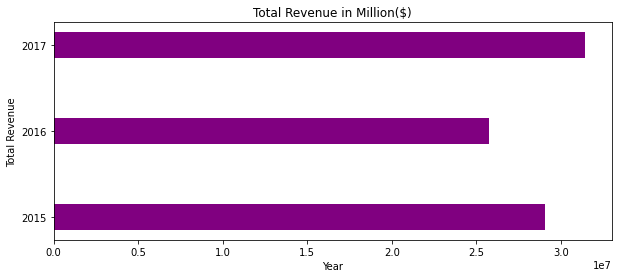

In [ ]:
# Total Revenue
data = {'2015': rev_15 ,'2016': rev_16,'2017': rev_17}
x = list(data.keys())
y = list(data.values()) 
fig = plt.figure(figsize = (10, 4))
plt.barh(x, y, height=0.3, color='purple')
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.title("Total Revenue in Million($)")
plt.grid(False)
plt.show()

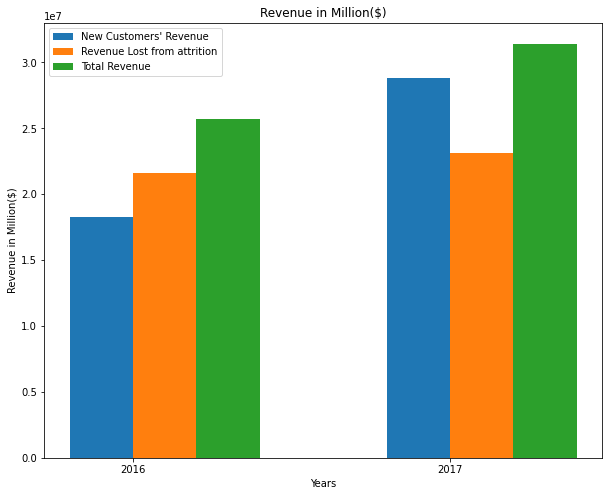

In [ ]:
#  Revenue
years = ['2016', '2017']
revenue_total = [rev_16, rev_17]
revenue_lost = [lost_16, lost_17]
revenue_new_cust = [ncr_16, ncr_17]

  
fig = plt.figure(figsize = (10, 8))  
X_axis = np.arange(len(years))
  
plt.bar(X_axis - 0.1, revenue_new_cust, 0.2, label = "New Customers' Revenue")
plt.bar(X_axis + 0.1, revenue_lost, 0.2, label = "Revenue Lost from attrition")
plt.bar(X_axis + 0.3, revenue_total, 0.2, label = "Total Revenue")

plt.xticks(X_axis, years)
plt.xlabel("Years")
plt.ylabel("Revenue in Million($)")
plt.title("Revenue in Million($)")
plt.legend()
plt.show()

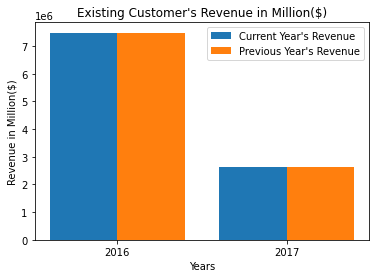

In [ ]:
# Existing Customer Revenue
years = ['2016', '2017']
revenue_curr = [ecr_16, ecr_17]
revenue_prev = [ecr_pr16, ecr_pr17]
  
X_axis = np.arange(len(years))
  
plt.bar(X_axis - 0.2, revenue_curr, 0.4, label = "Current Year's Revenue")
plt.bar(X_axis + 0.2, revenue_prev, 0.4, label = "Previous Year's Revenue")
  
plt.xticks(X_axis, years)
plt.xlabel("Years")
plt.ylabel("Revenue in Million($)")
plt.title("Existing Customer's Revenue in Million($)")
plt.legend()
plt.show()

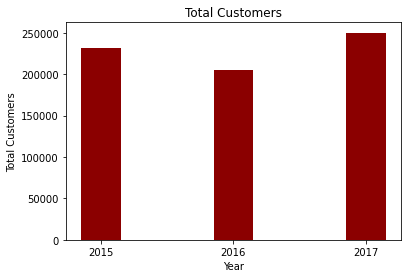

In [ ]:
# Total Customers Current Year
data = {'2015': c15,'2016': c16,'2017': c17}
x = list(data.keys())
y = list(data.values()) 
fig = plt.figure(figsize = (6, 4))
plt.bar(x, y, width=0.3, color='darkred')
plt.xlabel("Year")
plt.ylabel("Total Customers")
plt.title("Total Customers")
plt.grid(False)
plt.show()

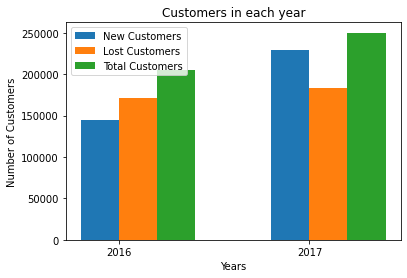

In [ ]:
# New and Lost Customers
X_years = ['2016', '2017']
new_customers = [n16, n17]
lost_customers = [l16, l17]
total_customers = [c16, c17]
  
X_axis = np.arange(len(X_years))
  
plt.bar(X_axis - 0.1, new_customers, 0.2, label = 'New Customers')
plt.bar(X_axis + 0.1, lost_customers, 0.2, label = 'Lost Customers')
plt.bar(X_axis + 0.3, total_customers, 0.2, label = 'Total Customers')
  
plt.xticks(X_axis, X_years)
plt.xlabel("Years")
plt.ylabel("Number of Customers")
plt.title("Customers in each year")
plt.legend()
plt.show()

***Notes for the Visualizations:***

* In 2016 the company had fewer customers than in 2015, but in 2017 the number of customers exceeded the number of those in 2015. The exact same pattern is observed in the total revenue, which is very reasonable according to the above.
* The total revenue of existing customers is almost the same between current and previous year, for both 2016 and 2017. The conclusion we can draw from this pattern is that the existing customers do not easily choose to leave or switch companies.
* In 2016, the company lost more customers than those who first came to the company. Fortunately, the same phenomenon was not observed in 2017, where the company seemed to gain many more customers than in previous years.
